# Лабораторная работа 11. Решение краевых задач. Методы коллокаций, наименьших квадратов и Галеркина.

## Вариант 8

### Задание

Методами коллокации, Галеркина, интегральным и дискретными методами наименьших квадратов получить численное решение краевой задачи.

$$ ay'' + (1+bx^2)y = -1, -1<=x<=1$$

Исходные данные

$$ a = sin(k), b = cos(k) $$

k - номер варианта

Базисная система: $$ \phi(x) = x^i (1 - x^2)$$

Граничные условия

$$ y(-1) = 0, y(1) = 0 $$

# Обозначим начальные условия

### Метод коллокации

Пусть будет 100 точек коллокации

In [15]:
dots = 100

Обозначим базисную функцию

In [16]:
import numpy as np
from scipy.misc import derivative
import math
a = math.sin(8)
b = math.cos(8)

In [17]:
fi = lambda i, x: x**i * (1 - x * x)

In [18]:
f = -1 / a

In [19]:
q = lambda x: 1 + x ** 2 * b / a

Обозначим невязку

In [20]:
def L(i, x):
    if i == 0:
        return - 2 + q(x) * fi(i, x)
    if i == 1:
        return -6*x + q(x) * fi(i, x)
    else:
        return (i * (i - 1) * x ** (i-2) - (i+1) * (i + 2) * x ** i) + q(x) * fi(i,x)
    

обозначим точки невязки

In [21]:
aa = np.linspace(-1, 1, dots)


заполним левую часть системы уравнений

In [22]:
cc=np.eye(dots)

for i in range(0, dots):
    for j in range(0,dots):
 
        cc[i,j] = L(j, aa[i])



заполним правую часть системы уравнений

In [23]:
B = [f for i in range(0 ,dots)]

In [24]:
A = np.linalg.solve(cc, B)


0.8491285882866122


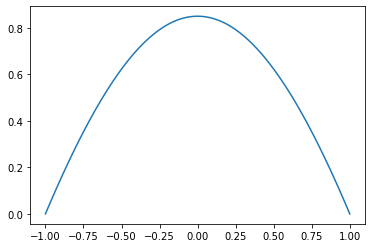

In [25]:
import matplotlib.pyplot as plt
plt.plot(aa,[sum(A[i] * fi(i, x) for i in range(dots)) for x in aa])
print(max([sum(A[i] * fi(i, x) for i in range(dots)) for x in aa]))

# Метод галеркина

Пусть имеем линеную краевую задачу.

Решение достигается тогда, когда значение интеграла от квадрата невязки было наименьшим.


$\int_a^b \psi^2(x_1, a_1, \dots, a_n)\mathrm{d}x$

Получается задача сводится к подбору таких коэффициетов, чтобы достигалось решение

инициализируем матрицу системы уравненеий

In [36]:
def rectangle_integral(f1, f2, i, j):
    h = (1 + 1) / 100
    x = np.linspace(-1 , 1, 100)
    S = h * sum(f1(i, x[k])*f2(j, x[k]) for k in range(100))
    return S
    

инициализируем метод прямоугольников для подсчета интеграла

$a_ij = \int_a^b{fi(x)\cdot L(x) \mathrm{d}x}$

In [27]:
import numpy as np
matrix = np.eye(100)
for i in range(100):
    for j in range(100):
        matrix[i][j] = rectangle_integral(i, j)


объявим правую часть

$b_k = \int_a^b{u_k(x)*(f(x)-L[u_0])}$

In [33]:
h = (1 + 1) / 100
x = np.linspace(-1, 1, 100)
B = [h*sum(fi(i, x[k]) * f for k in range(100)) for i in range(100)]
C = np.linalg.solve(matrix, B)

0.8491285882866122


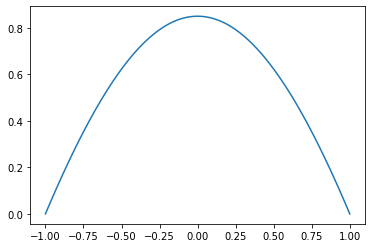

In [34]:
import matplotlib.pyplot as plt
plt.plot(aa,[sum(A[i] * fi(i, x) for i in range(dots)) for x in x])
print(max([sum(A[i] * fi(i, x) for i in range(dots)) for x in x]))

# Метод наименьших квадратов(интегральный)

Как и в методе коллокаций, приближенное решение строится по базисной системе. 

Но для нахождения коэффициентов при базисных функциях минимизирется интеграл от квадрата невязки

$\int_a^b \psi^2(x_1, a_1, \dots, a_n)\mathrm{d}x$

Для нахождеиня минимума интеграла вычисляем первые производнын от интеграла по параметрам

Инициализируем матрицу A

In [48]:
matrix = np.eye(100)
x = np.linspace(-1 , 1, 100)
e = np.linspace(-1, 1, 100)
for i in range(100):
    for j in range(100):
        matrix[i][j] = rectangle_integral(L,L,i,j)

Инициализирум правую часть

In [51]:
X = [1/ 50 *sum(f * L(j, x[k]) for k in range(100)) for j in range(100)]
A = np.linalg.solve(matrix, X)

0.8491285667009276


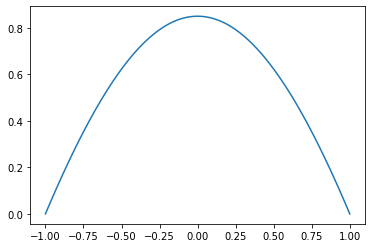

In [52]:
import matplotlib.pyplot as plt
plt.plot(e,[sum(A[i] * fi(i, x) for i in range(100)) for x in e])
print(max([sum(A[i] * fi(i, x) for i in range(100)) for x in e]))

# Метод наименьших квадратов(дискретный)

Коэффициенты должны обеспечить минимум суммы квадратов значений невязки.

$S = \sum_{i=1}^{n}\psi^2(x, a_1, \dots, a_n) -> min$

инициализируем матрицу

In [58]:
matrix = np.eye(100)
e = np.linspace(-1, 1, 100)

In [59]:
for i in range(100):
    for j in range(100):
        matrix[i][j] = sum(L(i, e[k])* L(j, e[k]) for k in range(100))
        

Инициализируем правую часть

In [64]:
B = [sum(f * L(i, e[k]) for k in range(100)) for i in range(100)]
A = np.linalg.solve(matrix, B)



0.8491285603336235


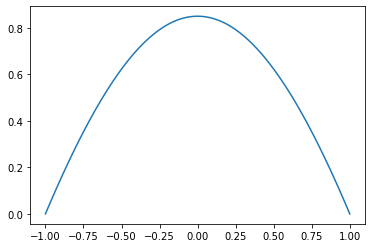

In [65]:
import matplotlib.pyplot as plt
plt.plot(e,[sum(A[i] * fi(i, x) for i in range(100)) for x in e])
print(max([sum(A[i] * fi(i, x) for i in range(100)) for x in e]))